# BEST CITY TO ALLOCATE A GAMING COMPANY

## Libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import math

from pymongo import MongoClient

import geopandas as gpd
from geopy.distance import distance
from shapely.geometry import Point
from descartes import PolygonPatch

import matplotlib.pyplot as plt
%matplotlib inline


from cartoframes.viz import Map, Layer
from cartoframes.viz.helpers import size_continuous_layer
from cartoframes.viz.widgets import histogram_widget

import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

## MongoDB

In [2]:
#Importing companies.json from mongodb.
client = MongoClient("mongodb://localhost/companies")
db = client.get_database()

In [3]:
#Importing information about companies from MongoDB.
query={"$and":[{"category_code":{"$eq":"games_video"}},{"number_of_employees":{"$gte":10}}]}
list_companies=list(db['companies'].find((query),{"category_code":1,'number_of_employees':1,'name':1,"total_money_raised":1,"offices":1,'_id':0}).sort("number_of_employees",-1))

In [4]:
#Converting the info into 'pandas'
df = pd.DataFrame(list_companies)

In [5]:
#Removing duplicates.
df = df.drop_duplicates(subset='name', keep='first')

In [6]:
#Removing the NAN values from offices column.
df.dropna(subset=['offices'], inplace=True)

In [7]:
#Removing the lists from offices column 
df = df.explode('offices')
exapand_office_column = df[["offices"]].apply(lambda r: r.offices, result_type="expand", axis=1)
data_expanded = pd.concat([df,exapand_office_column], axis=1)

In [8]:
#Removing old column with lists.
df_companies = data_expanded.drop(columns=["offices"])

In [9]:
#Removing the NAN long and latt columns.
df_companies.dropna(subset=['latitude'], inplace=True)
df_companies.dropna(subset=['longitude'], inplace=True)

## TOP 5 CITIES WITH MORE GAMING COMPANIES

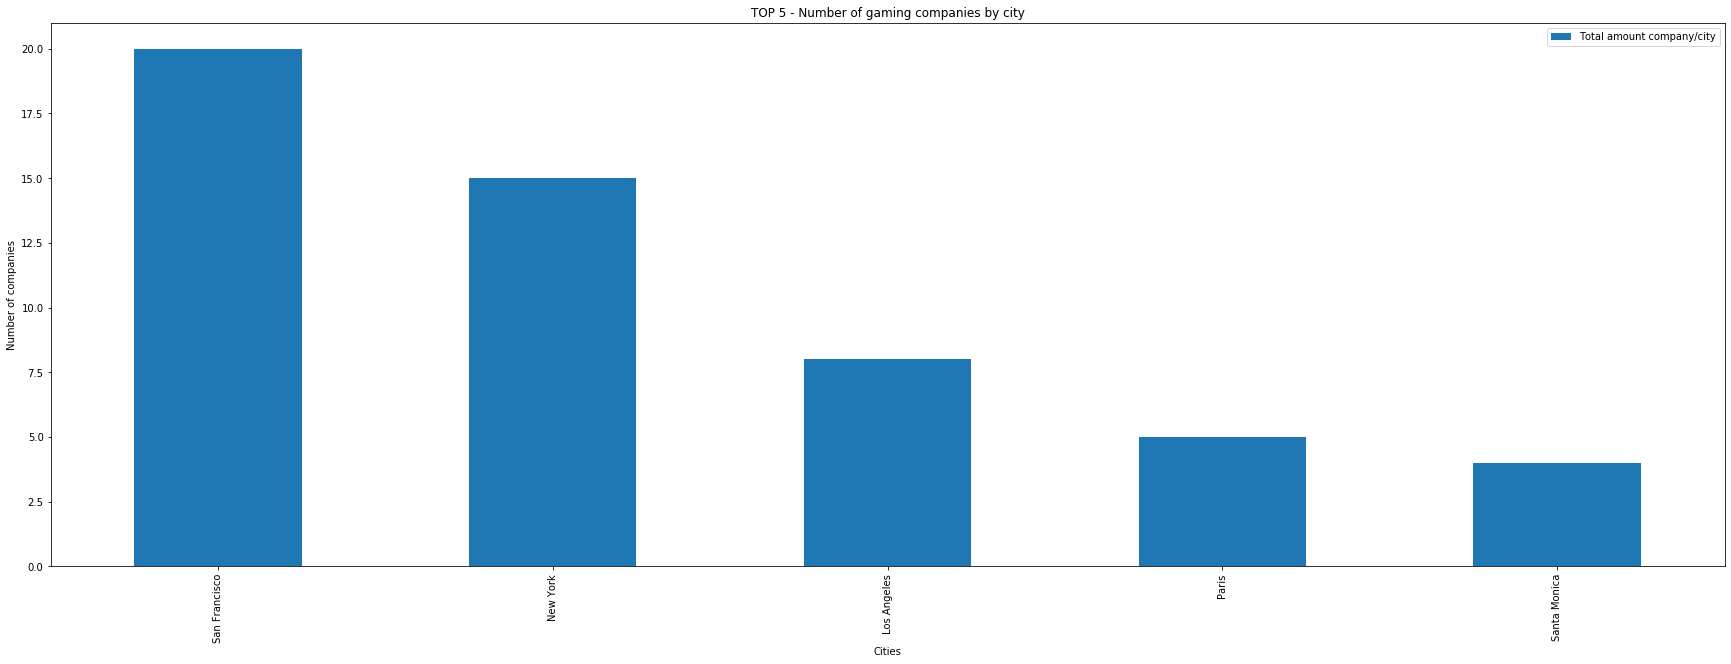

In [10]:
#TOP5 cities with more companies with 'category code' = 'video_games'

graph_df=df_companies[['city','name']]
graphic= graph_df.groupby('city').count().sort_values('name',ascending = False).head()

graphic.plot.bar(figsize=(30,10));
plt.legend(["Total amount company/city"])
plt.title("TOP 5 - Number of gaming companies by city")
plt.xlabel("Cities")
plt.ylabel("Number of companies");

## Convertig Companies' DataFrame into GeoDataFrame

In [11]:
gdf = gpd.GeoDataFrame(df_companies, geometry=gpd.points_from_xy(df_companies.longitude, df_companies.latitude))
gdf.head()

name category_code  number_of_employees  \
0                  Comcast   games_video               100000   
1  The Walt Disney Company   games_video                25000   
2                 Nintendo   games_video                 5080   
5                  Netflix   games_video                 2000   
9                    Kabam   games_video                  650   

  total_money_raised         description                address1   address2  \
0              $725M  One Comcast Center           1701 JFK Blvd              
1                 $0                None  500 S. Buena Vista St.              
2                 $0                None                    None       None   
5              $230M                None   100 Winchester Circle              
9              $125M                  HQ       795 Folsom Street  Suite 600   

  zip_code           city state_code country_code   latitude   longitude  \
0    19103   Philadelphia         PA          USA  39.952576  -75.165252   
1    91521        Burbank         CA          USA  34.156802 -118.324987   
2     None           None       None          JPN  36.204824  138.252924   
5    95032      Los Gatos         CA          USA  37.251420 -121.968687   
9    94107  San Francisco         CA          USA  37.394456 -122.078531   

                      geometry  
0   POINT (-75.16525 39.95258)  
1  POINT (-118.32499 34.15680)  
2   POINT (138.25292 36.20482)  
5  POINT (-121.96869 37.25142)  
9  POINT (-122.07853 37.39446)

In [24]:
Map([Layer(gdf), size_continuous_layer(gdf, 'number_of_employees')])

## MAPS BY CITY

### GEOCODE API: 
NEEDED FUNCTION IN ORDER TO EXTRACT COORD:

In [12]:
def geocode(address):
    data = requests.get(f"https://geocode.xyz/{address}?json=1").json()
    return {
        "type":"Point",
        "coordinates":[float(data["longt"]),float(data["latt"])]
    }

### 1 - SAN FRANCISCO

In [40]:
sf = geocode("San Francisco, CA, USA")
sf

{'type': 'Point', 'coordinates': [-122.40438, 37.66873]}

In [49]:
start_lat = 37.66873
start_lon = -122.40438
heat_m_sf = folium.Map(location=[start_lat, start_lon],tiles='cartodbpositron', zoom_start=15)
Marker([start_lat, start_lon], icon=folium.Icon(color='red')).add_to(heat_m_sf)
heat_m_sf

### 2 - NEW YORK

In [14]:
ny = geocode("New York")
ny

{'type': 'Point', 'coordinates': [-73.9586, 40.68908]}

In [48]:
start_lat = 40.689081
start_lon = -73.9586
heat_m_ny = folium.Map(location=[start_lat, start_lon],tiles='cartodbpositron', zoom_start=15)
Marker([start_lat, start_lon], icon=folium.Icon(color='red')).add_to(heat_m_ny)
heat_m_ny

### 3 - LOS ANGELES

In [17]:
la = geocode("Los Angeles")
la

{'type': 'Point', 'coordinates': [-118.29757, 34.04015]}

In [47]:
start_lat = 34.04015
start_lon = -118.29757
heat_m_la = folium.Map(location=[start_lat, start_lon],tiles='cartodbpositron', zoom_start=15)
Marker([start_lat, start_lon], icon=folium.Icon(color='red')).add_to(heat_m_la)
heat_m_la

### 4 - PARIS

In [19]:
paris = geocode("Paris")
paris

{'type': 'Point', 'coordinates': [2.34293, 48.85717]}

In [46]:
start_lat = 48.85717
start_lon = 2.34293
heat_m_paris = folium.Map(location=[start_lat, start_lon],tiles='cartodbpositron', zoom_start=15)
Marker([start_lat, start_lon], icon=folium.Icon(color='red')).add_to(heat_m_paris)
heat_m_paris

### 5 - SANTA MONICA

In [43]:
sm = geocode("Santa Monica, CA, USA")
sm

{'type': 'Point', 'coordinates': [-118.48319, 34.02401]}

In [45]:
start_lat = 34.02401
start_lon = -118.48319
heat_m_sm = folium.Map(location=[start_lat, start_lon],tiles='cartodbpositron', zoom_start=15)
Marker([start_lat, start_lon], icon=folium.Icon(color='red')).add_to(heat_m_sm)
heat_m_sm